In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from multiprocessing import Pool

In [3]:
eroadG   = nx.read_edgelist("euroroad.txt")
hamsterG = nx.read_edgelist("petser-hamster.tsv", comments="%")
neuralG  = nx.read_gml("celegansneural.gml")
usairG   = nx.read_weighted_edgelist("usairport.txt")

allG = [eroadG, hamsterG, neuralG, usairG]

In [4]:
for i in allG:
    print("Nodes:", len(i.nodes))
    print("Edges:", len(i.edges))
    print("Type:", type(i))

Nodes: 1174
Edges: 1417
Type: <class 'networkx.classes.graph.Graph'>
Nodes: 1858
Edges: 12534
Type: <class 'networkx.classes.graph.Graph'>
Nodes: 297
Edges: 2359
Type: <class 'networkx.classes.multidigraph.MultiDiGraph'>
Nodes: 1574
Edges: 17215
Type: <class 'networkx.classes.graph.Graph'>


In [5]:
for i in range(len(allG)):
    allG[i] = nx.Graph(allG[i])
    allG[i] = sorted(nx.connected_component_subgraphs(allG[i]), key=len, reverse=True)[0]

In [6]:
for i in allG:
    print("Nodes:", len(i.nodes))
    print("Edges:", len(i.edges))
    print("Type:", type(i))

Nodes: 1039
Edges: 1305
Type: <class 'networkx.classes.graph.Graph'>
Nodes: 1788
Edges: 12476
Type: <class 'networkx.classes.graph.Graph'>
Nodes: 297
Edges: 2148
Type: <class 'networkx.classes.graph.Graph'>
Nodes: 1572
Edges: 17214
Type: <class 'networkx.classes.graph.Graph'>


# Problem 1

In [192]:
from scipy.linalg import expm

def randomwalk_centrality(G, debug=False):
    vk = np.array(list(dict(G.degree()).values()))
    A = nx.adjacency_matrix(G).todense()
    P = np.multiply(A, 1/vk)
    if debug:
        print(P)
    P = expm(np.array(P)) / np.exp(1)
    if debug:
        print(P)
    
    centrality = -np.sum(np.multiply(P, np.log(P)), axis=1) # Sum the rows
    centrality = np.exp(centrality)
    centrality[np.isnan(centrality)] = 0 # The limit is 0

    return centrality

res = randomwalk_centrality(allG[3], debug=True)
print(len(res))
res

[[0.00000000e+00 2.25000000e-01 7.77777778e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.50000000e+00 0.00000000e+00 2.98111111e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.50000000e+00 6.70750000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 ...
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]]
1572


array([0., 0., 0., ..., 0., 0., 0.])

/home/mathjs/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


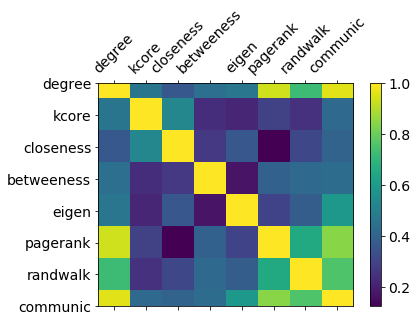

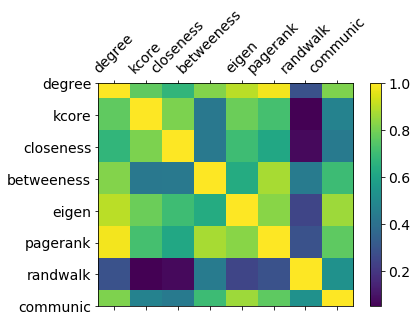

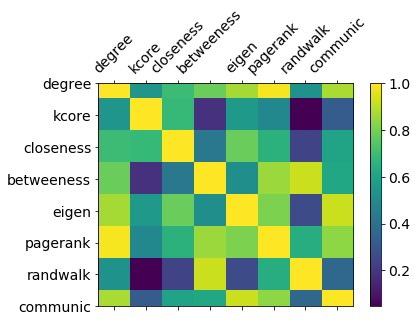

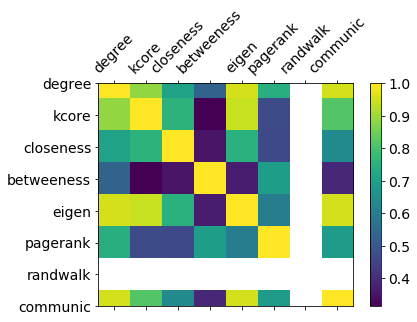

In [182]:
def getval(r):
    return np.array(list(dict(r).values()))

for g in allG:
    #print("degree")
    deg = getval(nx.degree_centrality(g))
    #print("kcore")
    kcore = getval(nx.core_number(g))
    #print("closeness")
    close = getval(nx.closeness_centrality(g))
    #print("betweeness")
    bet = getval(nx.betweenness_centrality(g))
    #print("eigenvector")
    eig = getval(nx.eigenvector_centrality(g, max_iter=1000, tol=1e-4))
    #print("page rank")
    pr  = getval(nx.pagerank(g))
    #print("random walk")
    rw  = randomwalk_centrality(g)
    #print("communicability")
    comm = nx.communicability_exp(g)
    comm = np.array([ comm[key1][key1] for key1 in comm.keys() ])
    
    data = np.transpose([deg, kcore, close, bet, eig, pr, rw, comm])
    df = pd.DataFrame(data,
        columns=["degree", "kcore", "closeness", "betweeness", "eigen", "pagerank", "randwalk", "communic"])
    
    # Special thanks for the plot goes to jrjc in
    # https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
    f = plt.figure()
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=70)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.show()

The first graph is the weirdest one, so let's plot it

/home/mathjs/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


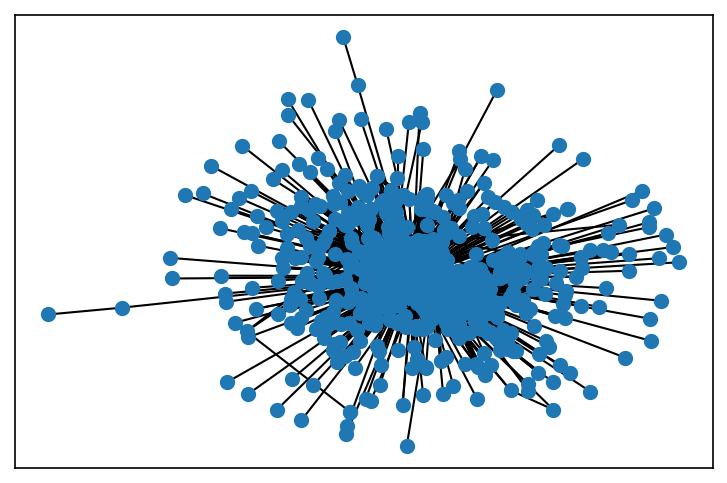

In [8]:
plt.figure(dpi=150)
nx.draw_networkx(allG[3], with_labels=False, node_size=40)
plt.show()

Let's see the degree distribution

2 197
3 145
4 108
5 80
6 41
7 39
8 32
9 40
10 23
11 21
12 22
13 18
14 29
15 14
16 11
17 23
18 17
19 21
20 12
21 16
22 8
23 13
24 12
25 10
26 9
27 13
28 7
29 8
30 6
31 3
32 3
33 6
34 3
35 6
36 5
37 6
38 1
39 3
40 4


<BarContainer object of 165 artists>

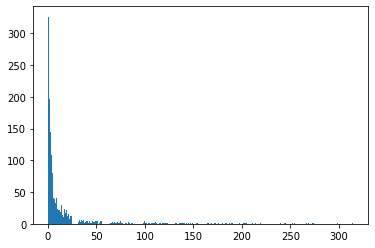

In [27]:
degs = list(dict(nx.degree(allG[3])).values())
for i in np.unique(degs)[1:40]:
    print(i, np.sum(degs == i))

aux = np.array([ (i, np.sum(degs == i)) for i in np.unique(degs) ])
plt.bar(aux[:,0], aux[:,1])

### It is still very weird that the centrality measures are not correlated for the first graph. Let's keep investigating it

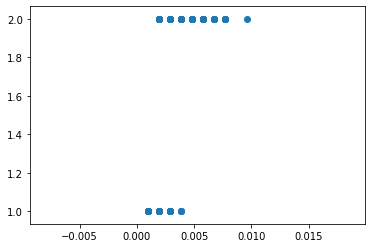

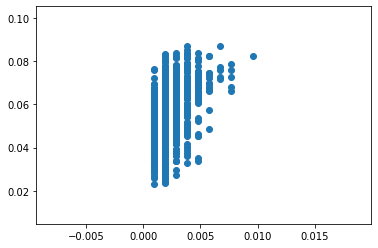

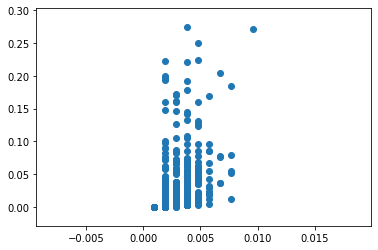

In [32]:
def getval(r):
    return np.array(list(dict(r).values()))

#print("degree")
deg = getval(nx.degree_centrality(allG[0]))
#print("kcore")
kcore = getval(nx.core_number(allG[0]))
#print("closeness")
close = getval(nx.closeness_centrality(allG[0]))
#print("betweeness")
bet = getval(nx.betweenness_centrality(allG[0]))

plt.figure()
plt.scatter(deg, kcore)
plt.show()

plt.figure()
plt.scatter(deg, close)
plt.show()

plt.figure()
plt.scatter(deg, bet)
plt.show()

(array([127., 554., 174., 112.,  46.,  15.,   5.,   5.,   0.,   1.]),
 array([0.00096339, 0.00183044, 0.0026975 , 0.00356455, 0.0044316 ,
        0.00529865, 0.0061657 , 0.00703276, 0.00789981, 0.00876686,
        0.00963391]),
 <a list of 10 Patch objects>)

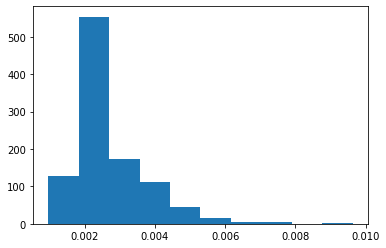

In [35]:
plt.hist(deg)

### Well, for the first graph it seems we have an enormous amount of low-degree nodes, which is making the centrality measures sort of "random"

### However, for the other 3 graphs, we see that the centrality measures are all highly correlated.

### What is specially interesting is that the page rank is very highly correlated to the degree centrality

### The betweeness seems to have little to do with the k-core

### In the last graph, we could not calculate the randomwalk centrality, as the exponential of the P matrix yields Infinite in all matrix entries.

# Problem 2